In [7]:
from converter import Converter

In [8]:
converter = Converter('images/神楽すず.jpg', 150)

In [10]:
colors = converter.to_base6()
bgcolor = converter.get_background_color(converter.data)
converter.data = converter.mask_background(
    converter.data, bgcolor, 10, 20
)

sequences = converter.to_escape_sequences(colors)
with open('tmp11.txt', 'w') as f:
    f.write(sequences)

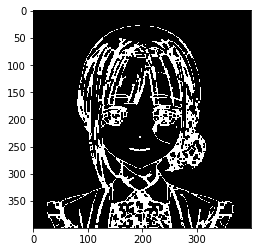

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

CANNY_THRESH_1 = 10
CANNY_THRESH_2 = 100

image = cv2.imread('images/鈴鹿歌子.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

plt.imshow(edges, cmap='gray')

In [2]:
contour_info = []
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for c in contours:
    contour_info.append((
        c,
        cv2.isContourConvex(c),
        cv2.contourArea(c),
    ))
contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
max_contour = contour_info[0]

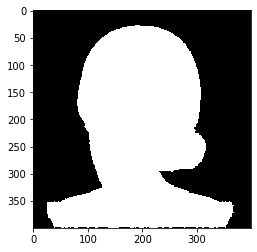

In [10]:
mask = np.zeros(edges.shape)
cv2.fillConvexPoly(mask, max_contour[0], (255))

plt.imshow(mask, cmap='gray')
plt.show()

In [19]:
image[mask == 0][0]

(82460, 3, 3)
(246022,)


In [15]:
np.array([255, 255, 255]) == 255

array([ True,  True,  True])

In [18]:
if (np.array([255, 255, 255]) == 0).all():
    print('a')